In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dosare_geocode_cu_pdfuri.csv")
print(df.head())

        Dosar PMB                               Solicitant     Notificare PMB  \
0  1 / 2001-02-19               LERESCU MAGDALENA VERONICA   847 / 2001-02-15   
1  1 / 2001-02-19               LERESCU MAGDALENA VERONICA   847 / 2001-02-15   
2  2 / 2001-02-23  BOCANCEA DRAGOS VASILE; BOCANCEA ANGELA   620 / 2001-02-21   
3  2 / 2001-11-15  BOCANCEA DRAGOS VASILE; BOCANCEA ANGELA  3232 / 2001-11-14   
4  3 / 2002-10-07                        BOCANCEA ANGELIKA   619 / 2001-02-21   

                                 Adresa contemporană  \
0     STR. CARAGEA IOAN VODA , nr.: 9-15, sector: 1,   
1                     STR. PARIS, nr.: 4, sector: 1,   
2  STR. EREMIA GRIGORESCU ap.parter , nr.: 18, se...   
3  STR. EREMIA GRIGORESCU ap.parter , nr.: 18, se...   
4     B-DUL FERDINAND I Etaj 2 , nr.: 41, sector: 2,   

                                     Adresa istorică Tip proprietate  \
0                                Strada Caragia Vodă          Imobil   
1                               

In [4]:
df.shape

(47022, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47022 entries, 0 to 47021
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dosar PMB            47022 non-null  object 
 1   Solicitant           47022 non-null  object 
 2   Notificare PMB       47022 non-null  object 
 3   Adresa contemporană  47022 non-null  object 
 4   Adresa istorică      47022 non-null  object 
 5   Tip proprietate      47022 non-null  object 
 6   Soluție              47022 non-null  object 
 7   Istorie acte         47022 non-null  object 
 8   Mai multe adrese     47022 non-null  object 
 9   latitude             33403 non-null  float64
 10  longitude            33403 non-null  float64
 11  Solutie_string       47022 non-null  object 
 12  Solutie_grup         47022 non-null  object 
 13  Pdf_nume             7099 non-null   object 
 14  Pdf_valid            47022 non-null  bool   
dtypes: bool(1), float64(2), object(12)
m

In [7]:
df.columns.tolist()

['Dosar PMB',
 'Solicitant',
 'Notificare PMB',
 'Adresa contemporană',
 'Adresa istorică',
 'Tip proprietate',
 'Soluție',
 'Istorie acte',
 'Mai multe adrese',
 'latitude',
 'longitude',
 'Solutie_string',
 'Solutie_grup',
 'Pdf_nume',
 'Pdf_valid']

In [8]:
df.isnull().sum()

Dosar PMB                  0
Solicitant                 0
Notificare PMB             0
Adresa contemporană        0
Adresa istorică            0
Tip proprietate            0
Soluție                    0
Istorie acte               0
Mai multe adrese           0
latitude               13619
longitude              13619
Solutie_string             0
Solutie_grup               0
Pdf_nume               39923
Pdf_valid                  0
dtype: int64

In [9]:
df.nunique()

Dosar PMB              42612
Solicitant             30390
Notificare PMB         38057
Adresa contemporană    36354
Adresa istorică         2492
Tip proprietate           26
Soluție                18584
Istorie acte            4982
Mai multe adrese           2
latitude               13663
longitude              13718
Solutie_string           458
Solutie_grup              38
Pdf_nume                6425
Pdf_valid                  2
dtype: int64

In [11]:
df["Solutie_string"].value_counts()


Solutie_string
NONE                              20535
Masuri Reparatorii                 9012
MCP                                4135
Restituire in natura               3252
Se respinge                        2486
                                  ...  
Declinare MIN. CULTURII               1
DJCL-Declin.Prim.Popesti L.           1
DJCL-Declinare-Prim.Com.Jilava        1
DJCL-Declin.Prim.Constanta            1
RN +Respins                           1
Name: count, Length: 458, dtype: int64

In [13]:
sol_vals = df["Solutie_grup"].unique().tolist()
for v in sol_vals:
    print(repr(v))


'Restituire'
'Compensare/Despagubiri'
'Respins/Negativ'
'NONE'
'Revocare/Anulare'
'Declinare/Transfer'
'RETUR PMB'
'DOSAR RETUR de la AVAS'
'Dos. intors de la Min.Educ.'
'TRANSMITERE AVAS'
'Despagubire'
'Dos. returnat de la minister'
'DOSAR INTORS PMB'
'Oras Pucioasa Cons. Judetean'
'Autoritatea pt. Privatizare'
'Dosar Returnat PMB'
'TRANSMITERE ANRP'
'RETUR PRIMARIE'
'TRANSMITERE AAAS'
'RETUR PMB DE LA RAAPPS'
'RETUR PMB (SC SERICO SA)'
'Dos.intors L.10'
'Dosar intors la L.10'
'Dos.intors la L.10'
'Retur PMB (cf.dec.22/ 24.05.17'
'Decl. compet.UNIV .POLI TEHNIC'
'Retur de la Academia Romana'
'TRANSMITERE DOS. AAAS'
'TRANSMITERE DOS. ANRP'
'SRI'
'Decl. competenta Min.Turism'
'Dos. intors AAAS'
'RETUR PMB ( SC SERICO SA)'
'Decl. compet..Curtea de Contur'
'RETUR DOSAR PRIMARIE'
'APELO'
'DLCL-Declnare AVAS'
'Decl.RAAPPS'


Numar total puncte: 33403
Puncte in Bucuresti: 33311
Puncte in afara Bucurestiului: 92

Exemple de outlieri:
        latitude  longitude
40     44.392299  26.025466
42     44.392299  26.025466
43     44.392299  26.025466
1083   44.392299  26.025466
2525   44.392299  26.025466
2526   44.392299  26.025466
3003   44.926928  26.031105
3837   44.514714  26.104032
4350   44.516064  26.014739
5549   44.515630  26.104331
6383   44.930573  26.046685
7625   44.392299  26.025466
7867   44.392299  26.025466
8796   44.516064  26.014739
9721   44.392299  26.025466
11625  44.927349  26.030986
12515  44.404399  25.973606
12574  44.514985  26.235507
13278  44.927349  26.030986
14130  44.919676  26.034347


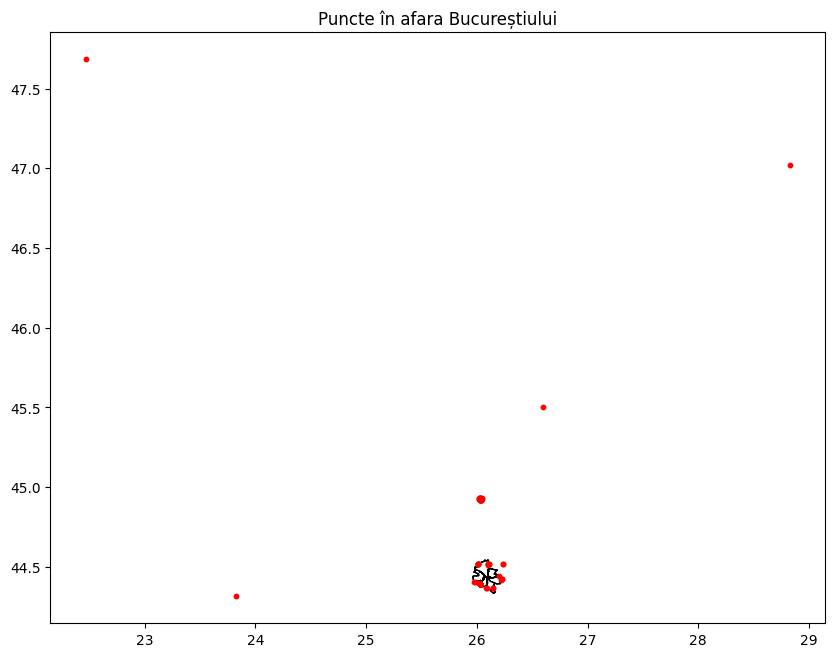

In [24]:
import geopandas as gpd
from shapely.geometry import Point

df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df_geo = df.dropna(subset=["latitude", "longitude"]).copy()

df_geo["geometry"] = [Point(xy) for xy in zip(df_geo["longitude"], df_geo["latitude"])]
gdf_points = gpd.GeoDataFrame(df_geo, geometry="geometry", crs="EPSG:4326")

gdf_poly = gpd.read_file("RO-B-294fb6d7-20251108-en-gpkg/data/boundary-polygon.gpkg")
gdf_poly = gdf_poly.to_crs("EPSG:4326")

inside_mask = gdf_points.within(gdf_poly.union_all())
outside_mask = ~inside_mask

puncte_in = gdf_points[inside_mask]
puncte_out = gdf_points[outside_mask]

print("Numar total puncte:", len(gdf_points))
print("Puncte in Bucuresti:", len(puncte_in))
print("Puncte in afara Bucurestiului:", len(puncte_out))

print("\nExemple de outlieri:")
print(puncte_out[["latitude", "longitude"]].head(20))

fig, ax = plt.subplots(figsize=(10, 10))
gdf_poly.plot(ax=ax, color="white", edgecolor="black")
puncte_out.plot(ax=ax, color="red", markersize=10)
plt.title("Puncte în afara Bucureștiului")
plt.show()


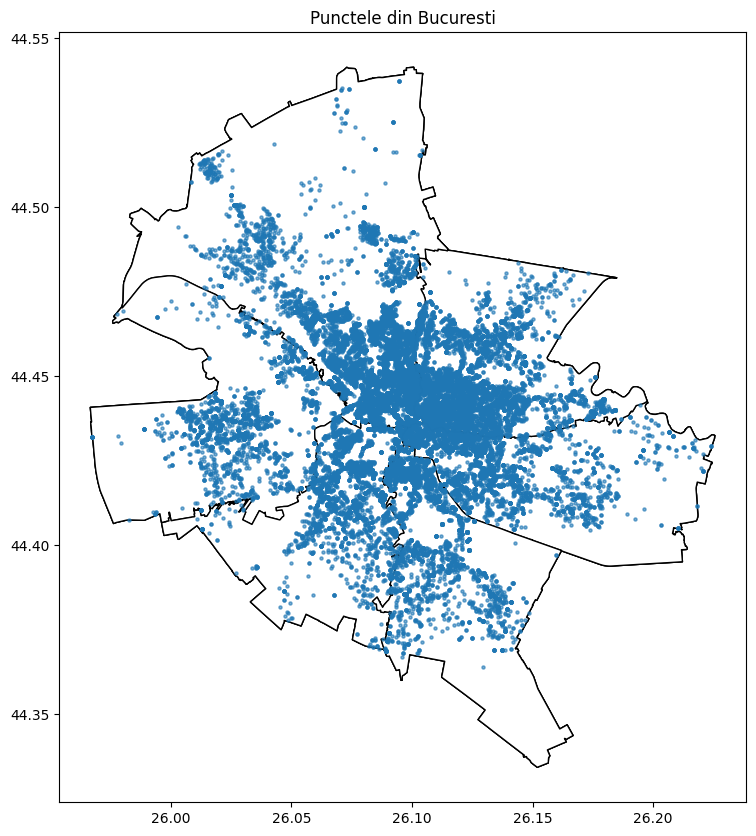

In [25]:
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

df_geo = df.dropna(subset=["latitude", "longitude"]).copy()
df_geo["geometry"] = [Point(xy) for xy in zip(df_geo["longitude"], df_geo["latitude"])]
gdf_points = gpd.GeoDataFrame(df_geo, geometry="geometry", crs="EPSG:4326")

gdf_poly = gpd.read_file("RO-B-294fb6d7-20251108-en-gpkg/data/boundary-polygon.gpkg")
gdf_poly = gdf_poly.to_crs("EPSG:4326")

inside_mask = gdf_points.within(gdf_poly.union_all())
puncte_in = gdf_points[inside_mask]

fig, ax = plt.subplots(figsize=(10, 10))

gdf_poly.plot(ax=ax, color="white", edgecolor="black")
puncte_in.plot(ax=ax, markersize=5, alpha=0.6)

plt.title("Punctele din Bucuresti")
plt.show()


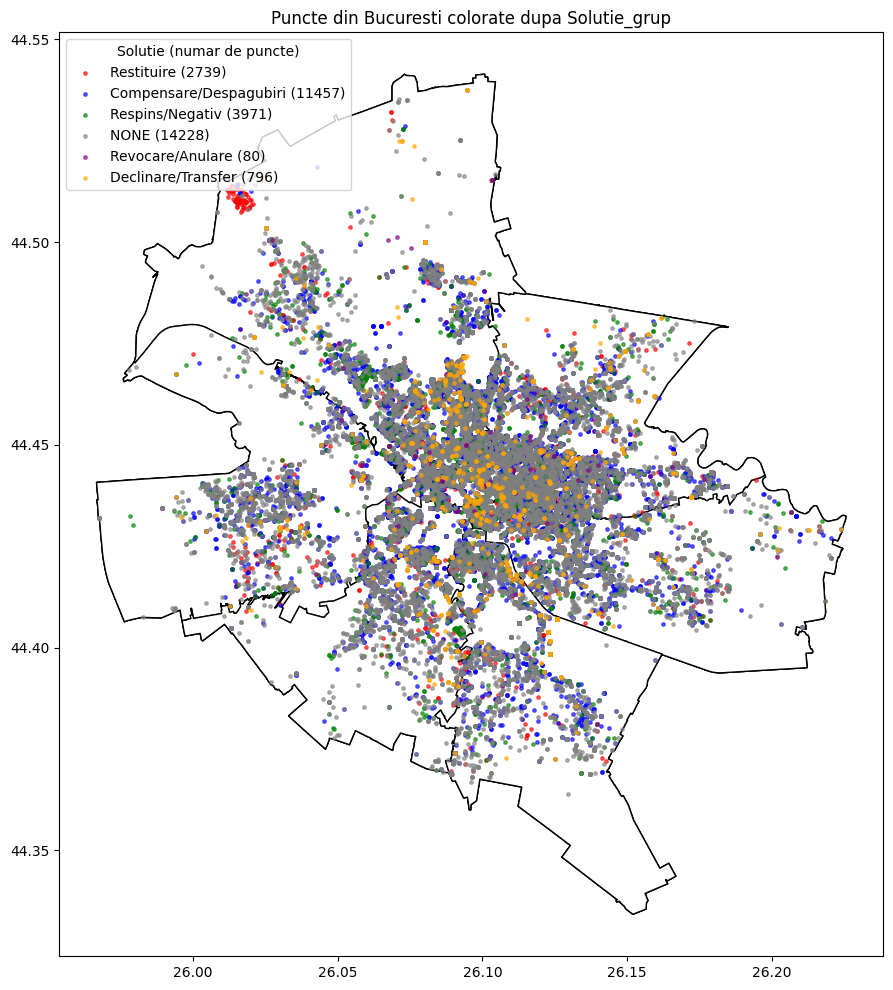

Numar puncte pe fiecare solutie:

Solutie_grup
Restituire                 2739
Compensare/Despagubiri    11457
Respins/Negativ            3971
NONE                      14228
Revocare/Anulare             80
Declinare/Transfer          796
Name: count, dtype: int64

Total puncte afisate: 33271


In [27]:
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

df_geo = df.dropna(subset=["latitude", "longitude"]).copy()
df_geo["geometry"] = [Point(xy) for xy in zip(df_geo["longitude"], df_geo["latitude"])]
gdf_points = gpd.GeoDataFrame(df_geo, geometry="geometry", crs="EPSG:4326")

gdf_poly = gpd.read_file("RO-B-294fb6d7-20251108-en-gpkg/data/boundary-polygon.gpkg")
gdf_poly = gdf_poly.to_crs("EPSG:4326")

inside_mask = gdf_points.within(gdf_poly.union_all())
puncte_in = gdf_points[inside_mask]

solutii_interes = [
    "Restituire",
    "Compensare/Despagubiri",
    "Respins/Negativ",
    "NONE",
    "Revocare/Anulare",
    "Declinare/Transfer"
]

puncte_filtrate = puncte_in[puncte_in["Solutie_grup"].isin(solutii_interes)].copy()

fig, ax = plt.subplots(figsize=(12, 12))

gdf_poly.plot(ax=ax, color="white", edgecolor="black")

cmap = {
    "Restituire": "red",
    "Compensare/Despagubiri": "blue",
    "Respins/Negativ": "green",
    "NONE": "gray",
    "Revocare/Anulare": "purple",
    "Declinare/Transfer": "orange"
}

for sol, color in cmap.items():
    subset = puncte_filtrate[puncte_filtrate["Solutie_grup"] == sol]
    subset.plot(ax=ax, markersize=6, color=color, label=f"{sol} ({len(subset)})", alpha=0.6)

plt.legend(loc="upper left", title="Solutie (numar de puncte)")
plt.title("Puncte din Bucuresti colorate dupa Solutie_grup")
plt.show()

counturi = puncte_filtrate["Solutie_grup"].value_counts().reindex(solutii_interes, fill_value=0)
print("Numar puncte pe fiecare solutie:\n")
print(counturi)
print("\nTotal puncte afisate:", counturi.sum())


/tmp/ipykernel_3692/2259713737.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_wgs = gdf_poly.unary_union
/tmp/ipykernel_3692/2259713737.py:41: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_m = gdf_poly_m.unary_union.buffer(30)


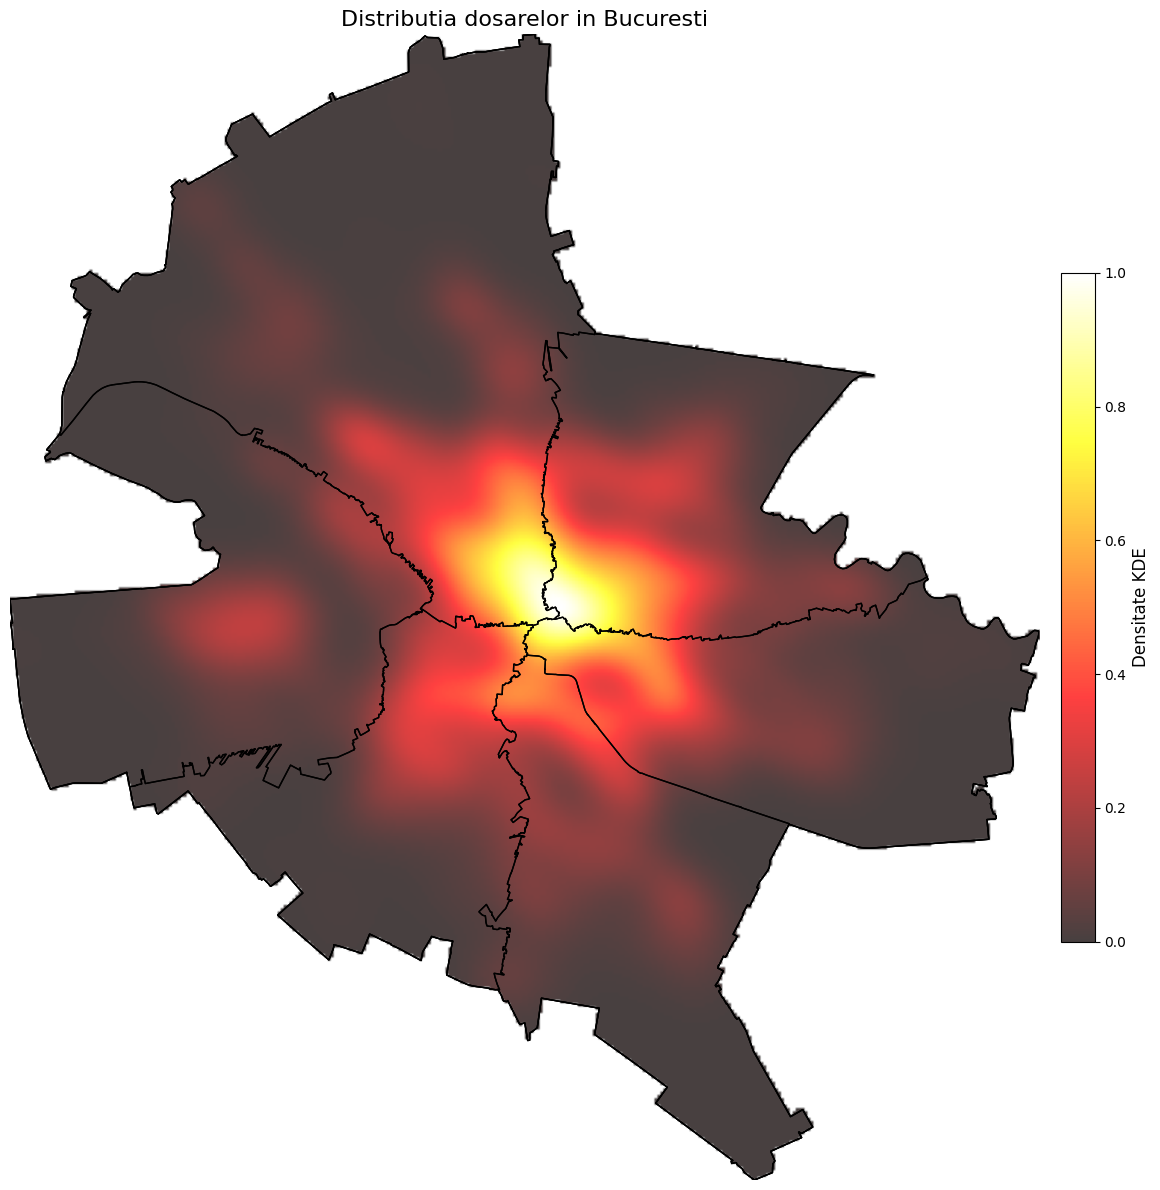

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


gdf_poly = gpd.read_file(
    "RO-B-294fb6d7-20251108-en-gpkg/data/boundary-polygon.gpkg"
).to_crs(4326)

df = pd.read_csv("dosare_geocode_cu_pdfuri.csv")
df = df.dropna(subset=["longitude", "latitude"])
df = df[(df["longitude"].between(10, 35)) & (df["latitude"].between(40, 60))]

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])],
    crs=4326
)

poly_wgs = gdf_poly.unary_union
gdf_buc = gdf_points[gdf_points.within(poly_wgs)].copy()

gdf_poly_m = gdf_poly.to_crs(3844)
gdf_buc_m = gdf_buc.to_crs(3844)

x = gdf_buc_m.geometry.x.values
y = gdf_buc_m.geometry.y.values

xmin, ymin, xmax, ymax = gdf_poly_m.total_bounds

N = 350  
xx, yy = np.mgrid[xmin:xmax:complex(N), ymin:ymax:complex(N)]
grid_positions = np.vstack([xx.ravel(), yy.ravel()])

kde = gaussian_kde(np.vstack([x, y])) 
density = kde(grid_positions).reshape(xx.shape)

poly_m = gdf_poly_m.unary_union.buffer(30)  

mask = np.array([
    poly_m.contains(Point(px, py))
    for px, py in zip(xx.ravel(), yy.ravel())
]).reshape(xx.shape)

density_masked = np.where(mask, density, np.nan)
density_norm = density_masked / np.nanmax(density_masked)


fig, ax = plt.subplots(figsize=(12, 12))

gdf_poly_m.boundary.plot(ax=ax, linewidth=1, edgecolor="black")

img = ax.imshow(
    density_norm.T,
    cmap="hot",
    origin="lower",
    extent=[xmin, xmax, ymin, ymax],
    alpha=0.75
)

plt.title("Distributia dosarelor in Bucuresti", fontsize=16)

# colorbar
cbar = plt.colorbar(img, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Densitate KDE", fontsize=12)

plt.axis("off")
plt.tight_layout()
plt.savefig("kde_bucuresti_FINAL_intreg.png", dpi=300, bbox_inches="tight")
plt.show()


In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

gdf_poly = gpd.read_file(
    "RO-B-294fb6d7-20251108-en-gpkg/data/boundary-polygon.gpkg"
).to_crs(4326)

poly_wgs = gdf_poly.unary_union
gdf_poly_m = gdf_poly.to_crs(3844)
xmin, ymin, xmax, ymax = gdf_poly_m.total_bounds

df = pd.read_csv("dosare_geocode_cu_pdfuri.csv")

# eliminare invalizi
df = df.dropna(subset=["longitude", "latitude"])
df = df[(df["longitude"].between(10, 35)) & (df["latitude"].between(40, 60))]

# verificare că ai coloana
assert "Solutie_grup" in df.columns, "Nu ai coloana solutie_grup în CSV!"


gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])],
    crs=4326
)

gdf = gdf[gdf.within(poly_wgs)]           # doar București
gdf_m = gdf.to_crs(3844)                  # reproiectare în metri

def plot_kde_for_solution(solution, gdf_m, gdf_poly_m):

    subset = gdf_m[gdf_m["Solutie_grup"] == solution]

    if len(subset) < 20:
        print(f"[SKIP] {solution}: prea puține puncte ({len(subset)}).")
        return

    x = subset.geometry.x.values
    y = subset.geometry.y.values

    # GRID
    N = 350
    xx, yy = np.mgrid[xmin:xmax:complex(N), ymin:ymax:complex(N)]
    grid_positions = np.vstack([xx.ravel(), yy.ravel()])

    # KDE BANDWIDTH DEFAULT
    kde = gaussian_kde(np.vstack([x, y]))
    density = kde(grid_positions).reshape(xx.shape)

    # MASCĂ CU BUFFER
    poly_buffer = gdf_poly_m.unary_union.buffer(30)
    mask = np.array([
        poly_buffer.contains(Point(px, py))
        for px, py in zip(xx.ravel(), yy.ravel())
    ]).reshape(xx.shape)

    density_masked = np.where(mask, density, np.nan)

    # NORMALIZARE 0–1
    density_norm = density_masked / np.nanmax(density_masked)

    # PLOT
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf_poly_m.boundary.plot(ax=ax, linewidth=1, edgecolor="black")

    img = ax.imshow(
        density_norm.T,
        cmap="hot",
        origin="lower",
        extent=[xmin, xmax, ymin, ymax],
        alpha=0.75
    )

    plt.title(f"Densitate dosare – {solution}", fontsize=16)

    cbar = plt.colorbar(img, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label("Densitate KDE", fontsize=12)

    plt.axis("off")
    plt.tight_layout()

    safe_name = solution.replace("/", "_").replace(" ", "_")
    outname = f"kde_bucuresti_{safe_name}.png"
    plt.savefig(outname, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"[OK] Salvat: {outname}")

solutions = [
    "Restituire",
    "Compensare/Despagubiri",
    "Respins/Negativ",
    "NONE",
    "Revocare/Anulare",
    "Declinare/Transfer"
]

os.makedirs("kde_per_solutie", exist_ok=True)
os.chdir("kde_per_solutie")

for sol in solutions:
    plot_kde_for_solution(sol, gdf_m, gdf_poly_m)


/tmp/ipykernel_3692/811947259.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_wgs = gdf_poly.unary_union
/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_Restituire.png


/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_Compensare_Despagubiri.png


/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_Respins_Negativ.png


/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_NONE.png


/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_Revocare_Anulare.png


/tmp/ipykernel_3692/811947259.py:71: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_buffer = gdf_poly_m.unary_union.buffer(30)


[OK] Salvat: kde_bucuresti_Declinare_Transfer.png
